In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [82]:
df = pd.read_csv('data/all_stars_averages.csv')

In [83]:
# create plots directory
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

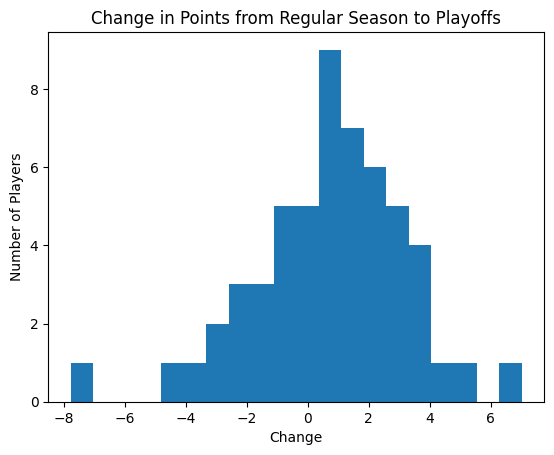

In [84]:
# plot the change in points from regular season to playoffs
# get the all star names
all_stars = df['PLAYER_NAME'].unique()
pt_changes = []

for star in all_stars:
    # get their reg season points and playoff points
    reg_pts = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Regular')]['PTS'].values[0]
    playoff_pts = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Playoffs')]['PTS'].values[0]
    # calculate the percent change
    change = (playoff_pts - reg_pts)
    pt_changes.append(change)

# plot these percent changes
plt.hist(pt_changes, bins=20)
plt.title('Change in Points from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Number of Players')
plt.savefig('plots/pt_changes_hist.png')
plt.show()

/var/folders/m0/l6jpq4w579906wrx6f1v04700000gn/T/ipykernel_42708/3091204900.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels, rotation=90, ha='right')


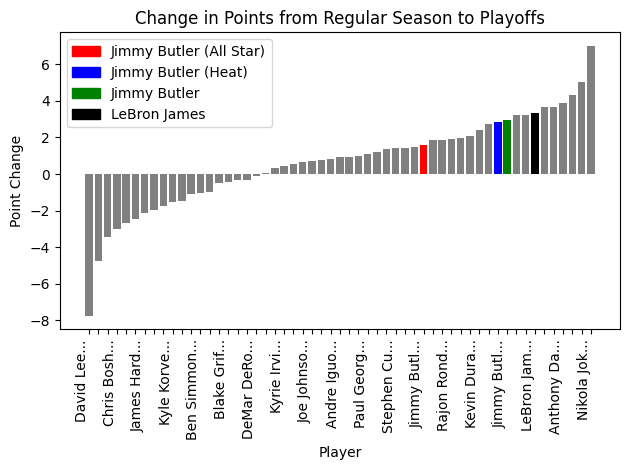

In [85]:
# plot a vertical bar graph of the point changes
# only label some of the points so it's not too cluttered
# highlight the columns that are jimmy butler in red

# Sort the names and indices based on the point changes
sorted_names = [x for _, x in sorted(zip(pt_changes, all_stars))]
sorted_indices = sorted(range(len(pt_changes)), key=lambda k: pt_changes[k])

# get the indices of jimmy butler
jimmy_indices = [i for i, name in enumerate(sorted_names) if 'Jimmy Butler' in name]

# Create a list of colors for the bars, with a different color for each jimmy butler and grey for the others
bar_colors = ['grey'] * len(sorted_names)
bar_colors[jimmy_indices[0]] = 'red'
bar_colors[jimmy_indices[1]] = 'blue'
bar_colors[jimmy_indices[2]] = 'green'
# set the bar color of lebron james to black
bar_colors[sorted_names.index('LeBron James')] = 'black'

# Plot the vertical bar chart
plt.bar(sorted_names, [pt_changes[i] for i in sorted_indices], color=bar_colors)

# cap the height of the xlabel by adding ellipses
plt.gcf().canvas.draw()
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label[:10] + '...' if len(label) > 8 else label for label in labels]
plt.gca().set_xticklabels(labels, rotation=90, ha='right')

# add a legend for the colors
red_patch = mpatches.Patch(color='red', label='Jimmy Butler (All Star)')
blue_patch = mpatches.Patch(color='blue', label='Jimmy Butler (Heat)')
green_patch = mpatches.Patch(color='green', label='Jimmy Butler')
black_patch = mpatches.Patch(color='black', label='LeBron James')

plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch])

# only label every third bar from the right to the left
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 3 != 0:
        label.set_visible(False)

plt.title('Change in Points from Regular Season to Playoffs')
plt.xlabel('Player')
plt.ylabel('Point Change')
plt.tight_layout()
plt.savefig('plots/pt_changes_bar.png')
plt.show()


In [86]:
# now do the same analysis for PLUS_MINUS
pm_changes = []

for star in all_stars:
    # get their reg season plus minus and playoff plus minus
    reg_pm = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Regular')]['PLUS_MINUS'].values[0]
    playoff_pm = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Playoffs')]['PLUS_MINUS'].values[0]
    # calculate the percent change
    change = (playoff_pm - reg_pm)
    pm_changes.append(change)

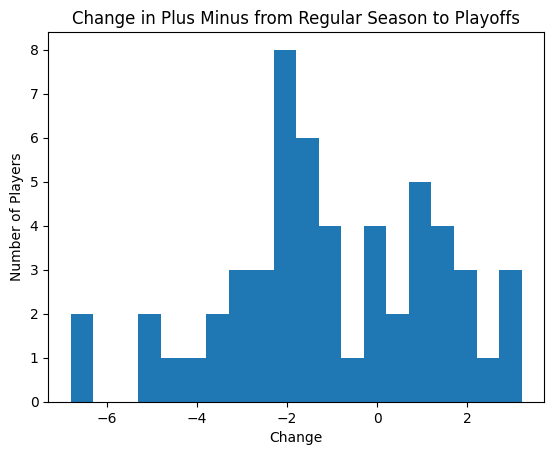

In [87]:
# plot these percent changes
plt.hist(pm_changes, bins=20)
plt.title('Change in Plus Minus from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Number of Players')
plt.savefig('plots/pm_changes_hist.png')
plt.show()

/var/folders/m0/l6jpq4w579906wrx6f1v04700000gn/T/ipykernel_42708/884315069.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels, rotation=90, ha='right')


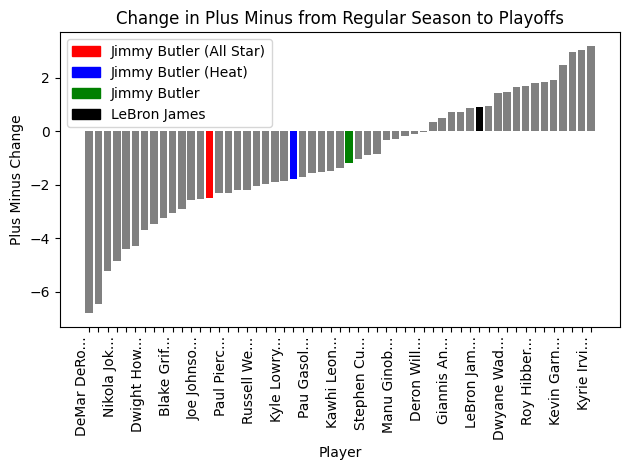

In [88]:
# plot a vertical bar graph of the plus minus changes
# only label some of the points so it's not too cluttered
# highlight the columns that are jimmy butler in red

# Sort the names and indices based on the plus minus changes
sorted_names = [x for _, x in sorted(zip(pm_changes, all_stars))]
sorted_indices = sorted(range(len(pm_changes)), key=lambda k: pm_changes[k])

# get the indices of jimmy butler
jimmy_indices = [i for i, name in enumerate(sorted_names) if 'Jimmy Butler' in name]

# Create a list of colors for the bars, with a different color for each jimmy butler and grey for the others
bar_colors = ['grey'] * len(sorted_names)
bar_colors[jimmy_indices[0]] = 'red'
bar_colors[jimmy_indices[1]] = 'blue'
bar_colors[jimmy_indices[2]] = 'green'
# set the bar color of lebron james to black
bar_colors[sorted_names.index('LeBron James')] = 'black'

# Plot the vertical bar chart
plt.bar(sorted_names, [pm_changes[i] for i in sorted_indices], color=bar_colors)

# cap the height of the xlabel by adding ellipses
plt.gcf().canvas.draw()
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label[:10] + '...' if len(label) > 8 else label for label in labels]
plt.gca().set_xticklabels(labels, rotation=90, ha='right')

# add a legend for the colors
red_patch = mpatches.Patch(color='red', label='Jimmy Butler (All Star)')
blue_patch = mpatches.Patch(color='blue', label='Jimmy Butler (Heat)')
green_patch = mpatches.Patch(color='green', label='Jimmy Butler')
black_patch = mpatches.Patch(color='black', label='LeBron James')

plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch])

# only label every third bar from the right to the left
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 3 != 0:
        label.set_visible(False)

plt.title('Change in Plus Minus from Regular Season to Playoffs')
plt.xlabel('Player')
plt.ylabel('Plus Minus Change')
plt.tight_layout()
plt.savefig('plots/pm_changes_bar.png')
plt.show()


In [89]:
adv_stats_reg = pd.read_csv('data/advanced_stats.csv')
adv_stats_playoffs = pd.read_csv('data/advanced_stats_playoffs.csv')

all_stars = df['PLAYER_NAME'].unique()

# get the adv stats for all stars
adv_stats_reg = adv_stats_reg.loc[adv_stats_reg['Player'].isin(all_stars)]
adv_stats_playoffs = adv_stats_playoffs.loc[adv_stats_playoffs['Player'].isin(all_stars)]

# we need to get the average BPM and average WS/48 for each player
# we can do this by grouping by player name and taking the mean of the BPM and WS/48 columns
adv_stats_reg_avg = adv_stats_reg[["Player", "BPM", "WS/48"]].groupby('Player').mean()
adv_stats_playoffs_avg = adv_stats_playoffs[["Player", "BPM", "WS/48"]].groupby('Player').mean()

# we need to handle the Jimmy Butler (all star) and Jimmy Butler (Heat) cases
# for all star we need to average just the rows of jimmy butler from 2015-2022
# for heat we need to average just the rows of jimmy butler from 2019-2022

# get the rows of jimmy butler from 2015-2022
jimmy_butler_all_star = adv_stats_reg.loc[(adv_stats_reg['Player'] == 'Jimmy Butler') & (adv_stats_reg['Year'] >= 2015)]
# get the rows of jimmy butler from 2019-2022
jimmy_butler_heat = adv_stats_reg.loc[(adv_stats_reg['Player'] == 'Jimmy Butler') & (adv_stats_reg['Year'] >= 2019)]

# get the average BPM and WS/48 for jimmy butler (all star)
jimmy_butler_all_star_avg = jimmy_butler_all_star[["Player", "BPM", "WS/48"]].groupby('Player').mean()
# get the average BPM and WS/48 for jimmy butler (heat)
jimmy_butler_heat_avg = jimmy_butler_heat[["Player", "BPM", "WS/48"]].groupby('Player').mean()

# update the player name to be "Jimmy Butler (All Star)" and "Jimmy Butler (Heat)"
jimmy_butler_all_star_avg = jimmy_butler_all_star_avg.rename(index={'Jimmy Butler': 'Jimmy Butler (All Star)'})
jimmy_butler_heat_avg = jimmy_butler_heat_avg.rename(index={'Jimmy Butler': 'Jimmy Butler (Heat)'})

# add these rows to the adv_stats_reg_avg dataframe
adv_stats_reg_avg = pd.concat([adv_stats_reg_avg, jimmy_butler_all_star_avg])
adv_stats_reg_avg = pd.concat([adv_stats_reg_avg, jimmy_butler_heat_avg])

# now do the same for the playoffs
# get the rows of jimmy butler from 2015-2022
jimmy_butler_all_star = adv_stats_playoffs.loc[(adv_stats_playoffs['Player'] == 'Jimmy Butler') & (adv_stats_playoffs['Year'] >= 2015)]
# get the rows of jimmy butler from 2019-2022
jimmy_butler_heat = adv_stats_playoffs.loc[(adv_stats_playoffs['Player'] == 'Jimmy Butler') & (adv_stats_playoffs['Year'] >= 2019)]

# get the average BPM and WS/48 for jimmy butler (all star)
jimmy_butler_all_star_avg_pf = jimmy_butler_all_star[["Player", "BPM", "WS/48"]].groupby('Player').mean()
# get the average BPM and WS/48 for jimmy butler (heat)
jimmy_butler_heat_avg_pf = jimmy_butler_heat[["Player", "BPM", "WS/48"]].groupby('Player').mean()

# update the player name to be "Jimmy Butler (All Star)" and "Jimmy Butler (Heat)"
jimmy_butler_all_star_avg_pf = jimmy_butler_all_star_avg_pf.rename(index={'Jimmy Butler': 'Jimmy Butler (All Star)'})
jimmy_butler_heat_avg_pf = jimmy_butler_heat_avg_pf.rename(index={'Jimmy Butler': 'Jimmy Butler (Heat)'})

# add these rows to the adv_stats_reg_avg dataframe
adv_stats_playoffs_avg = pd.concat([adv_stats_playoffs_avg, jimmy_butler_all_star_avg_pf])
adv_stats_playoffs_avg = pd.concat([adv_stats_playoffs_avg, jimmy_butler_heat_avg_pf])


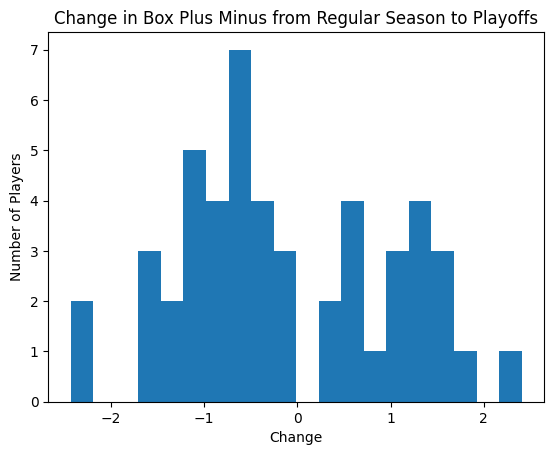

In [90]:
# now do the same analysis for bpm
bpm_changes = []
adv_all_stars = []

for star in all_stars:
    if star not in adv_stats_reg_avg.index or star not in adv_stats_playoffs_avg.index:
        continue
    adv_all_stars.append(star)
    # get their reg season plus minus and playoff plus minus
    reg_bpm = adv_stats_reg_avg.loc[star]['BPM']
    playoff_bpm = adv_stats_playoffs_avg.loc[star]['BPM']
    # calculate the percent change
    change = (playoff_bpm - reg_bpm)
    bpm_changes.append(change)

# plot these percent changes
plt.hist(bpm_changes, bins=20)
plt.title('Change in Box Plus Minus from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Number of Players')
plt.savefig('plots/bpm_changes_hist.png')
plt.show()

/var/folders/m0/l6jpq4w579906wrx6f1v04700000gn/T/ipykernel_42708/2093072599.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels, rotation=90, ha='right')


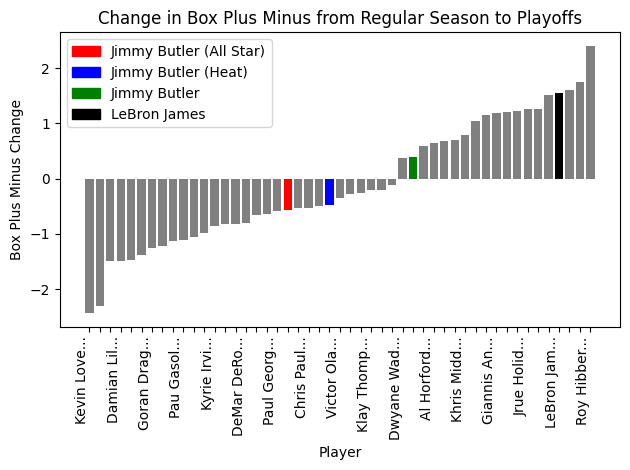

In [91]:
# plot a vertical bar graph of the box plus minus changes
# only label some of the points so it's not too cluttered
# highlight the columns that are jimmy butler in red

# Sort the names and indices based on the plus minus changes
sorted_names = [x for _, x in sorted(zip(bpm_changes, adv_all_stars))]
sorted_indices = sorted(range(len(bpm_changes)), key=lambda k: bpm_changes[k])

# get the indices of jimmy butler
jimmy_indices = [i for i, name in enumerate(sorted_names) if 'Jimmy Butler' in name]

# Create a list of colors for the bars, with a different color for each jimmy butler and grey for the others
bar_colors = ['grey'] * len(sorted_names)
bar_colors[jimmy_indices[0]] = 'red'
bar_colors[jimmy_indices[1]] = 'blue'
bar_colors[jimmy_indices[2]] = 'green'
# set the bar color of lebron james to black
bar_colors[sorted_names.index('LeBron James')] = 'black'

# Plot the vertical bar chart
plt.bar(sorted_names, [bpm_changes[i] for i in sorted_indices], color=bar_colors)

# cap the height of the xlabel by adding ellipses
plt.gcf().canvas.draw()
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label[:10] + '...' if len(label) > 8 else label for label in labels]
plt.gca().set_xticklabels(labels, rotation=90, ha='right')

# add a legend for the colors
red_patch = mpatches.Patch(color='red', label='Jimmy Butler (All Star)')
blue_patch = mpatches.Patch(color='blue', label='Jimmy Butler (Heat)')
green_patch = mpatches.Patch(color='green', label='Jimmy Butler')
black_patch = mpatches.Patch(color='black', label='LeBron James')

plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch])

# only label every third bar from the right to the left
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 3 != 0:
        label.set_visible(False)

plt.title('Change in Box Plus Minus from Regular Season to Playoffs')
plt.xlabel('Player')
plt.ylabel('Box Plus Minus Change')
plt.tight_layout()
plt.savefig('plots/bpm_changes_bar.png')
plt.show()


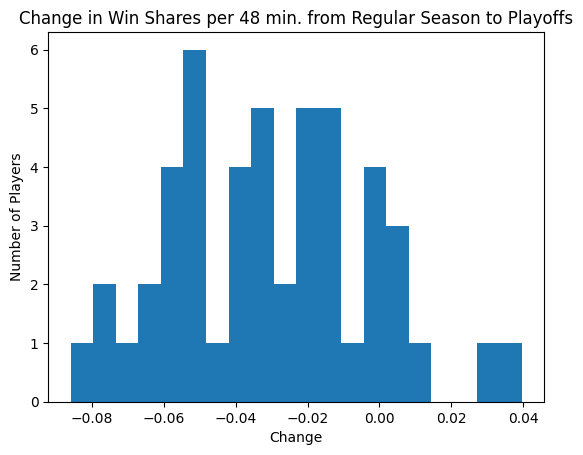

In [92]:
# now do the same analysis for ws/48
ws_changes = []
adv_all_stars = []

for star in all_stars:
    if star not in adv_stats_reg_avg.index or star not in adv_stats_playoffs_avg.index:
        continue
    adv_all_stars.append(star)
    # get their reg season plus minus and playoff plus minus
    reg_ws = adv_stats_reg_avg.loc[star]['WS/48']
    playoff_ws = adv_stats_playoffs_avg.loc[star]['WS/48']
    # calculate the percent change
    change = (playoff_ws - reg_ws)
    ws_changes.append(change)

# plot these percent changes
plt.hist(ws_changes, bins=20)
plt.title('Change in Win Shares per 48 min. from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Number of Players')
plt.savefig('plots/ws_changes_hist.png')
plt.show()

/var/folders/m0/l6jpq4w579906wrx6f1v04700000gn/T/ipykernel_42708/4148319912.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels, rotation=90, ha='right')


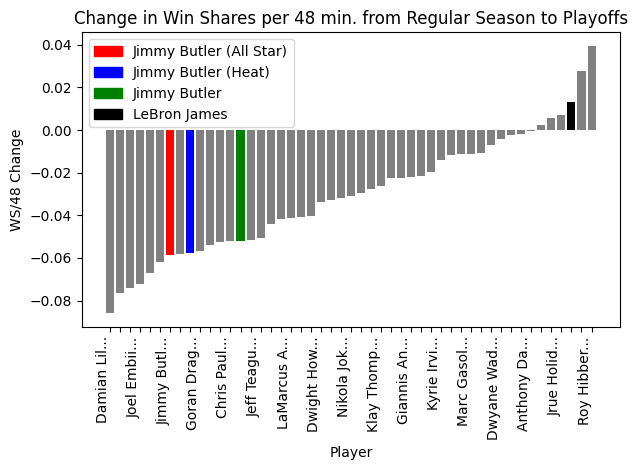

In [93]:
# plot a vertical bar graph of the box plus minus changes
# only label some of the points so it's not too cluttered
# highlight the columns that are jimmy butler in red

# Sort the names and indices based on the plus minus changes
sorted_names = [x for _, x in sorted(zip(ws_changes, adv_all_stars))]
sorted_indices = sorted(range(len(ws_changes)), key=lambda k: ws_changes[k])

# get the indices of jimmy butler
jimmy_indices = [i for i, name in enumerate(sorted_names) if 'Jimmy Butler' in name]

# Create a list of colors for the bars, with a different color for each jimmy butler and grey for the others
bar_colors = ['grey'] * len(sorted_names)
bar_colors[jimmy_indices[0]] = 'red'
bar_colors[jimmy_indices[1]] = 'blue'
bar_colors[jimmy_indices[2]] = 'green'
# set the bar color of lebron james to black
bar_colors[sorted_names.index('LeBron James')] = 'black'

# Plot the vertical bar chart
plt.bar(sorted_names, [ws_changes[i] for i in sorted_indices], color=bar_colors)

# cap the height of the xlabel by adding ellipses
plt.gcf().canvas.draw()
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels = [label[:10] + '...' if len(label) > 8 else label for label in labels]
plt.gca().set_xticklabels(labels, rotation=90, ha='right')

# add a legend for the colors
red_patch = mpatches.Patch(color='red', label='Jimmy Butler (All Star)')
blue_patch = mpatches.Patch(color='blue', label='Jimmy Butler (Heat)')
green_patch = mpatches.Patch(color='green', label='Jimmy Butler')
black_patch = mpatches.Patch(color='black', label='LeBron James')

plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch])

# only label every third bar from the right to the left
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 3 != 0:
        label.set_visible(False)

plt.title('Change in Win Shares per 48 min. from Regular Season to Playoffs')
plt.xlabel('Player')
plt.ylabel('WS/48 Change')
plt.tight_layout()
plt.savefig('plots/ws_changes_bar.png')
plt.show()
